In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import pickle
matplotlib.rcParams["figure.figsize"] = (20, 10)
import gzip, pickle, pickletools

In [2]:
df = pd.read_csv('data/MELBOURNE_HOUSE_PRICES_LESS.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
df.shape

(63023, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [6]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [7]:
# Percentage of data with null entry for Price
len(df[df['Price'].isnull()])/len(df)*100

23.150278469765006

In [8]:
df = df[['Suburb', 'Type', 'Rooms', 'Distance', 'Price']]

In [9]:
df = df.dropna()

In [10]:
df.shape

(48433, 5)

In [11]:
len(df.Suburb.unique())

370

In [12]:
locations = df.groupby('Suburb')['Suburb'].agg('count').sort_values(ascending = False)

In [13]:
locations

Suburb
Reservoir         1067
Bentleigh East     696
Richmond           642
Craigieburn        598
Preston            593
                  ... 
Cockatoo             1
Chintin              1
Castella             1
Belgrave South       1
Kallista             1
Name: Suburb, Length: 370, dtype: int64

In [14]:
other_locations = locations[locations < 10]

In [15]:
df['Suburb']  = df['Suburb'].apply(lambda x: 'other' if x in other_locations else x)

In [16]:
len(df['Suburb'].unique())

305

In [17]:
# Detecting outliers

In [18]:
df.head()

,Suburb,Type,Rooms,Distance,Price
0,Abbotsford,h,3,3.0,1490000.0
1,Abbotsford,h,3,3.0,1220000.0
2,Abbotsford,h,3,3.0,1420000.0
3,Aberfeldie,h,3,7.5,1515000.0
4,Airport West,h,2,10.4,670000.0


In [19]:
df['Price'].describe()

count    4.843300e+04
mean     9.978982e+05
std      5.934989e+05
min      8.500000e+04
25%      6.200000e+05
50%      8.300000e+05
75%      1.220000e+06
max      1.120000e+07
Name: Price, dtype: float64

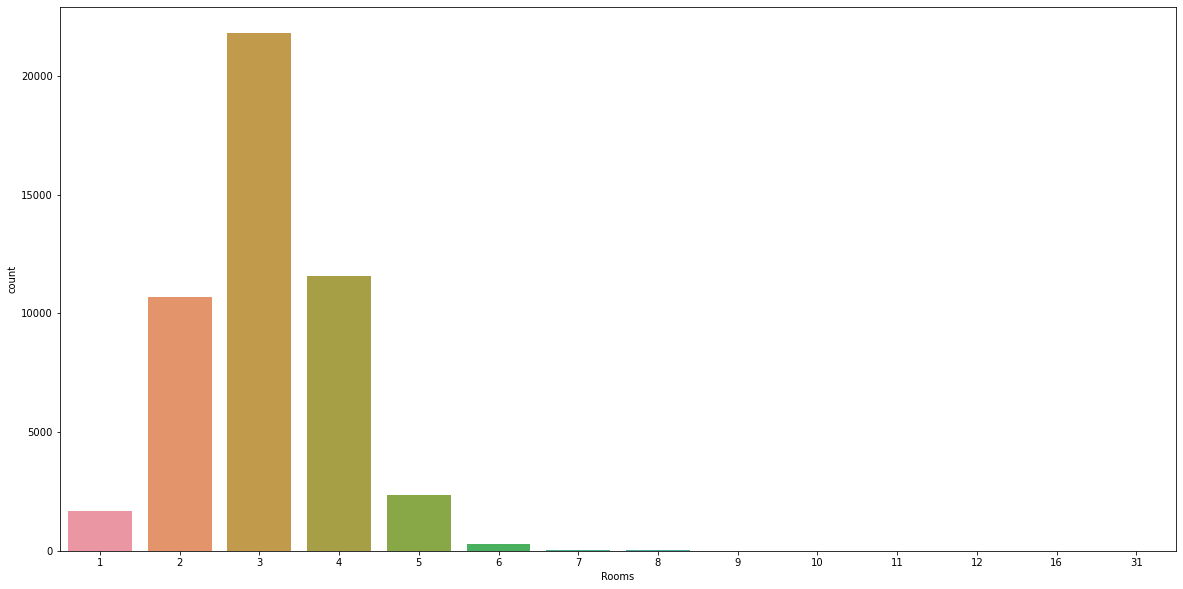

In [20]:
sns.countplot(x='Rooms', data=df)

In [21]:
df['Rooms'].value_counts()

3     21812
4     11576
2     10674
5      2350
1      1670
6       283
7        36
8        19
10        6
12        2
9         2
31        1
16        1
11        1
Name: Rooms, dtype: int64

/Users/badvendetta/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


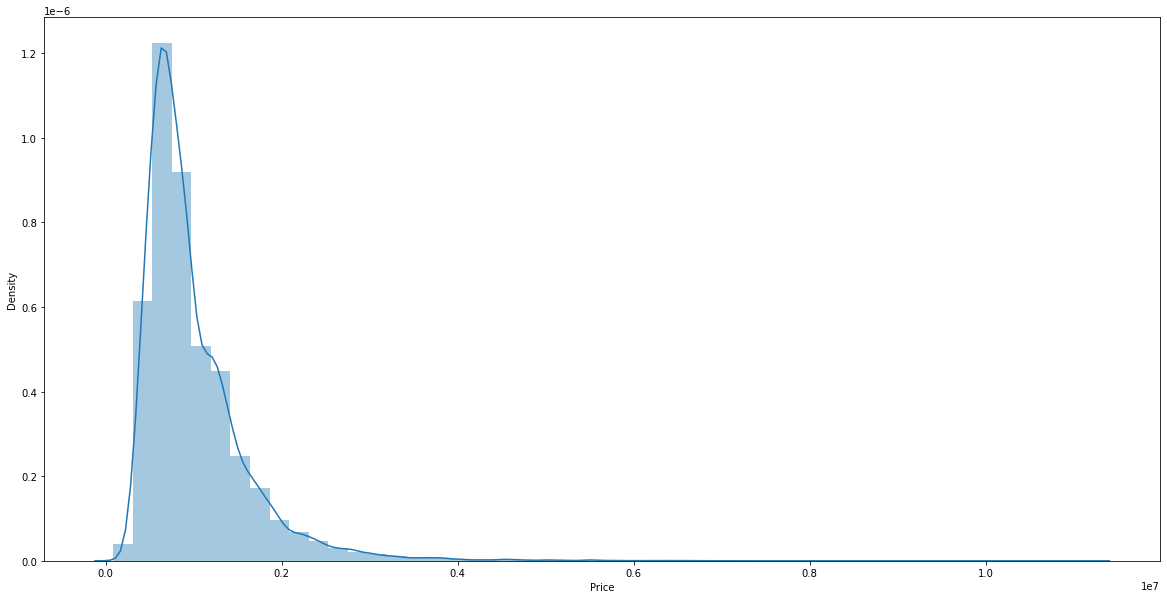

In [22]:
sns.distplot(df['Price'])

/Users/badvendetta/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


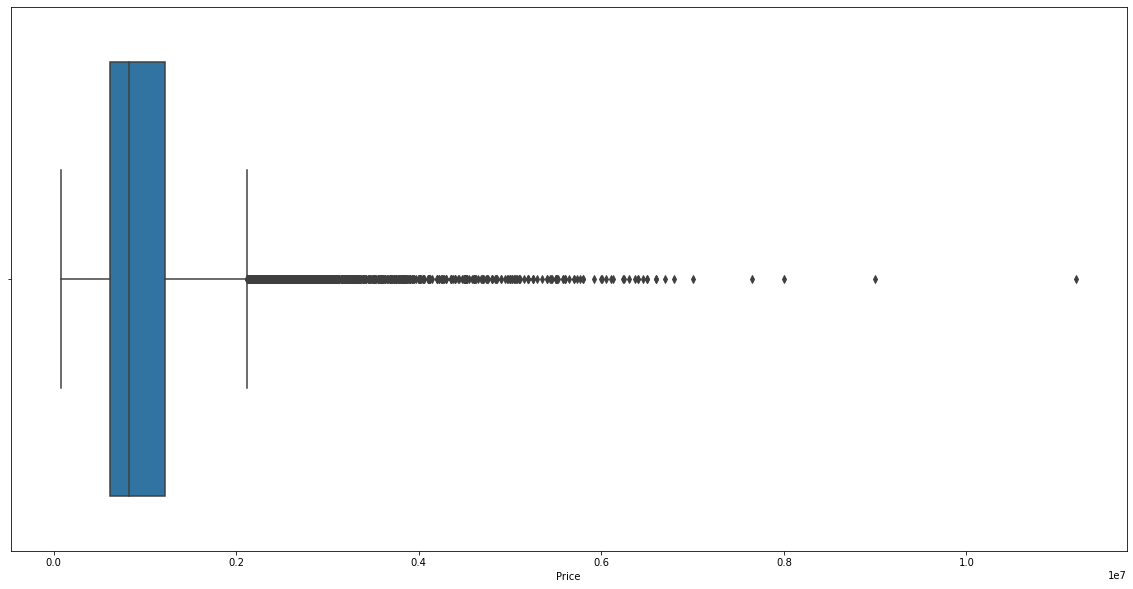

In [23]:
sns.boxplot(df['Price'])

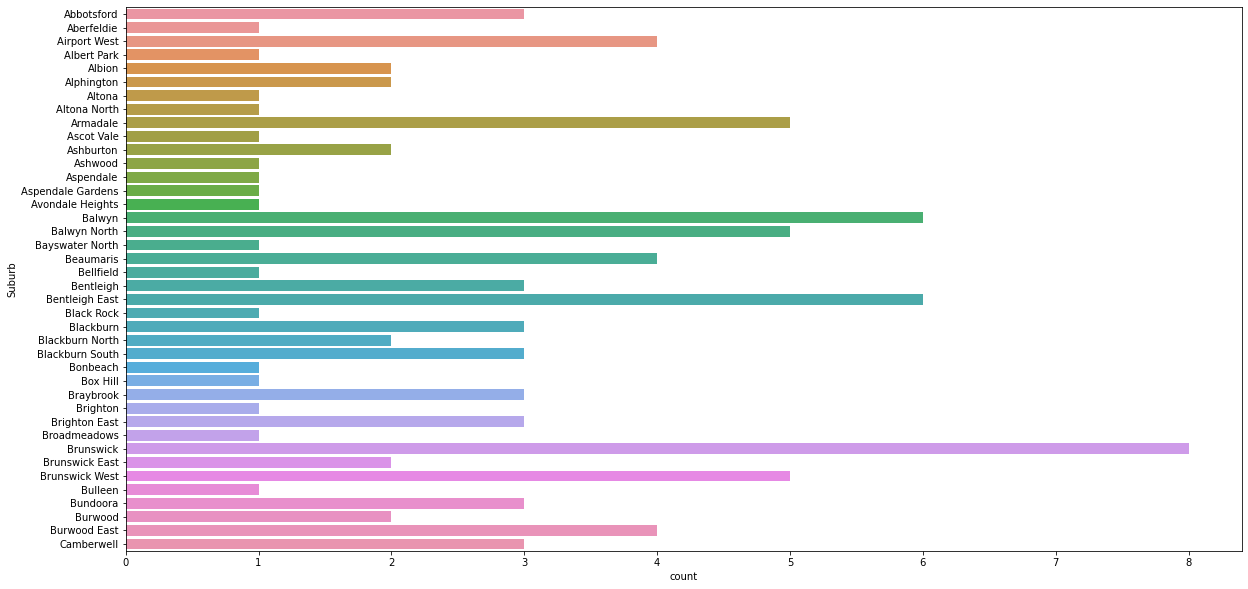

In [24]:
g = sns.countplot(data=df.head(100), y='Suburb')

In [25]:
len(df['Suburb'].unique())

305

In [26]:
df.head()

,Suburb,Type,Rooms,Distance,Price
0,Abbotsford,h,3,3.0,1490000.0
1,Abbotsford,h,3,3.0,1220000.0
2,Abbotsford,h,3,3.0,1420000.0
3,Aberfeldie,h,3,7.5,1515000.0
4,Airport West,h,2,10.4,670000.0


In [27]:
df = pd.get_dummies(df, columns = ['Suburb', 'Type'])

In [28]:
df.columns

Index(['Rooms', 'Distance', 'Price', 'Suburb_Abbotsford', 'Suburb_Aberfeldie',
       'Suburb_Airport West', 'Suburb_Albanvale', 'Suburb_Albert Park',
       'Suburb_Albion', 'Suburb_Alphington',
       ...
       'Suburb_Williamstown North', 'Suburb_Windsor', 'Suburb_Wollert',
       'Suburb_Wyndham Vale', 'Suburb_Yallambie', 'Suburb_Yarraville',
       'Suburb_other', 'Type_h', 'Type_t', 'Type_u'],
      dtype='object', length=311)

In [29]:
len(df.columns)

311

In [30]:
df.head()

,Rooms,Distance,Price,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,...,Suburb_Williamstown North,Suburb_Windsor,Suburb_Wollert,Suburb_Wyndham Vale,Suburb_Yallambie,Suburb_Yarraville,Suburb_other,Type_h,Type_t,Type_u
0,3,3.0,1490000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,3.0,1220000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3.0,1420000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,7.5,1515000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,10.4,670000.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
df.shape

(48433, 311)

In [32]:
X = df.drop('Price', axis = 'columns')

In [33]:
Y = df['Price']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [36]:
rf.score(X_test, Y_test)

0.7266651687811201

In [37]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, Y_train)

LinearRegression()

In [38]:
lm.score(X_test, Y_test)

0.642490617697337

In [39]:
X.columns

Index(['Rooms', 'Distance', 'Suburb_Abbotsford', 'Suburb_Aberfeldie',
       'Suburb_Airport West', 'Suburb_Albanvale', 'Suburb_Albert Park',
       'Suburb_Albion', 'Suburb_Alphington', 'Suburb_Altona',
       ...
       'Suburb_Williamstown North', 'Suburb_Windsor', 'Suburb_Wollert',
       'Suburb_Wyndham Vale', 'Suburb_Yallambie', 'Suburb_Yarraville',
       'Suburb_other', 'Type_h', 'Type_t', 'Type_u'],
      dtype='object', length=310)

In [40]:
def predict_price(suburb, type, rooms, distance):
    
    loc_index = np.where(X.columns == suburb)[0][0]
    type_index = np.where(X.columns == type)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = rooms
    x[1] = distance
    
    
    if loc_index >= 0:
        x[loc_index] = 1
        
    if type_index >= 0:
        x[type_index] = 1
    
    return rf.predict([x])[0]

In [41]:
predict_price('Suburb_Abbotsford', 'Type_h', 3, 3)

1258578.105618882

In [42]:
with gzip.open('melbourne_housing_model.pickle', "wb") as f:
    
    pickled = pickle.dumps(rf)
    
    optimized_pickle = pickletools.optimize(pickled)
    
    f.write(optimized_pickle)

In [ ]:
# with open('melbourne_housing_model.pickle', 'wb') as f:
#     pickle.dump(rf, f)

In [ ]:
import json

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))